<a href="https://www.kaggle.com/code/mustafahamed/malimg-cnn?scriptVersionId=100951941" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import sys
import os
from math import log
import numpy as np
import scipy as sp
from PIL import Image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
path_root = "../input/malimg/malimg_dataset/train"

In [3]:
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)

Found 7459 images belonging to 25 classes.


In [4]:
batches.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [5]:
imgs, labels = next(batches)

In [6]:
imgs.shape

(7459, 64, 64, 3)

In [7]:
labels.shape

(7459, 25)

In [8]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

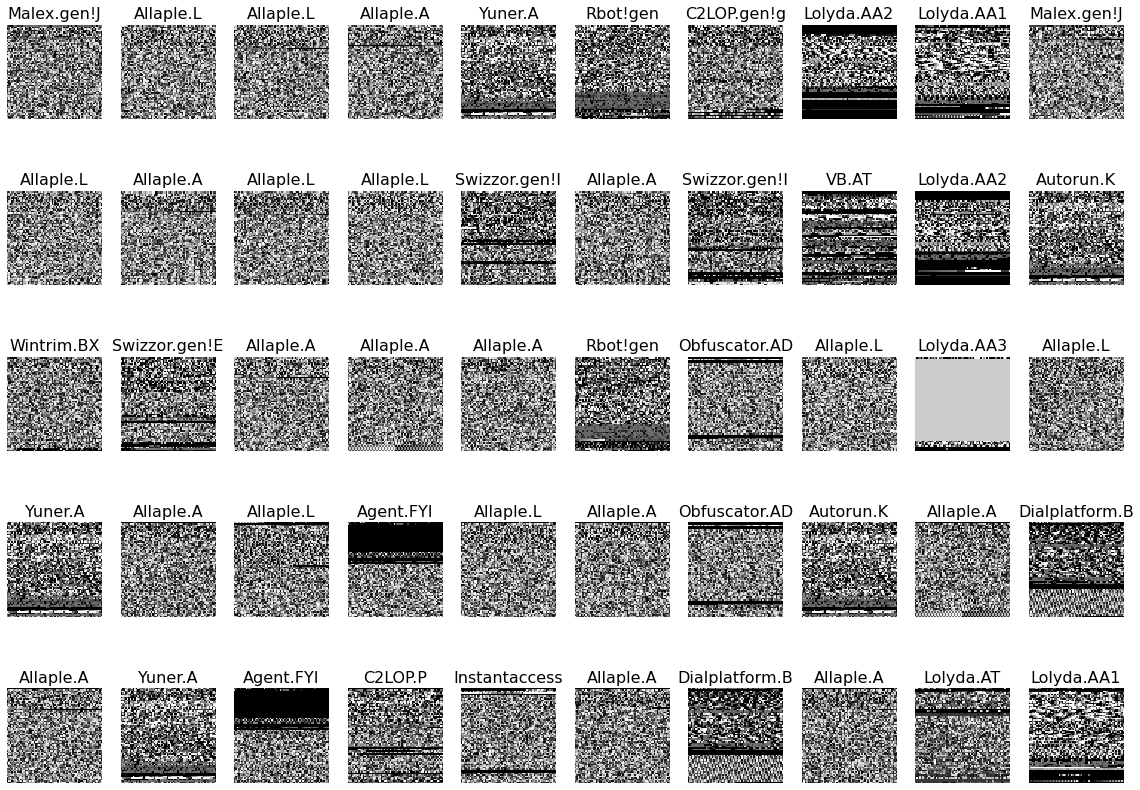

In [9]:
plots(imgs, titles = labels)

In [10]:
classes = batches.class_indices.keys()

In [11]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

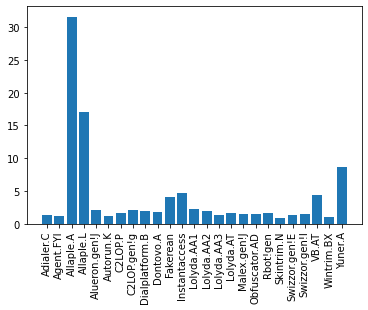

In [12]:
plt.xticks(rotation='vertical')
plt.bar(classes,perc)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

In [14]:
X_train.shape

(5221, 64, 64, 3)

In [15]:
X_test.shape

(2238, 64, 64, 3)

In [16]:
import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import batch_normalization

In [17]:
num_classes = 25

In [18]:
def malware_model():
    Malware_model = Sequential()
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))
    Malware_model.add(Dropout(0.25))
    Malware_model.add(Flatten())
    Malware_model.add(Dense(128, activation='relu'))
    Malware_model.add(Dropout(0.5))
    Malware_model.add(Dense(50, activation='relu'))
    Malware_model.add(Dense(num_classes, activation='softmax'))
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    return Malware_model

In [19]:
Malware_model = malware_model()

2022-07-16 02:34:43.517842: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 02:34:43.629313: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 02:34:43.630171: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-16 02:34:43.633364: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [20]:
Malware_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 30)        840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 15)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2940)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

In [21]:
y_train.shape

(5221, 25)

In [22]:
y_train_new = np.argmax(y_train, axis=1)

In [23]:
y_train_new

array([ 2,  3, 10, ...,  7,  5,  2])

In [24]:
#from sklearn.utils import class_weight
#class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train_new),y=y_train_new)

In [25]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=22)

2022-07-16 02:34:47.748107: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/22


2022-07-16 02:34:49.213671: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


164/164 [==============================] - 9s 8ms/step - loss: 1.9663 - accuracy: 0.4158 - val_loss: 1.0553 - val_accuracy: 0.6457
Epoch 2/22
164/164 [==============================] - 1s 5ms/step - loss: 1.0034 - accuracy: 0.6501 - val_loss: 0.6467 - val_accuracy: 0.7681
Epoch 3/22
164/164 [==============================] - 1s 6ms/step - loss: 0.6719 - accuracy: 0.7753 - val_loss: 0.4367 - val_accuracy: 0.8543
Epoch 4/22
164/164 [==============================] - 1s 5ms/step - loss: 0.4929 - accuracy: 0.8428 - val_loss: 0.3276 - val_accuracy: 0.9093
Epoch 5/22
164/164 [==============================] - 1s 5ms/step - loss: 0.3927 - accuracy: 0.8724 - val_loss: 0.3272 - val_accuracy: 0.9182
Epoch 6/22
164/164 [==============================] - 1s 5ms/step - loss: 0.3408 - accuracy: 0.8908 - val_loss: 0.2431 - val_accuracy: 0.9348
Epoch 7/22
164/164 [==============================] - 1s 5ms/step - loss: 0.3099 - accuracy: 0.9033 - val_loss: 0.2635 - val_accuracy: 0.9258
Epoch 8/22
164/16

In [26]:
scores = Malware_model.evaluate(X_test, y_test)

70/70 [==============================] - 0s 3ms/step - loss: 0.1561 - accuracy: 0.9531


In [27]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9530830979347229


In [28]:
#Lets anlysis our result:
import numpy as np
import pandas as pd

In [29]:
y_pred = Malware_model.predict(X_test[[0]])

In [30]:
y_pred

array([[2.2519097e-15, 1.0114628e-08, 9.9992323e-01, 1.2422496e-08,
        3.3312795e-09, 1.4684918e-13, 4.5768093e-06, 4.9315002e-08,
        2.0896725e-10, 2.7333674e-12, 3.0644628e-08, 5.1874111e-10,
        6.0589316e-09, 9.1357394e-11, 9.1783947e-10, 1.7498581e-09,
        1.6372000e-05, 5.6553540e-11, 1.2361663e-11, 4.0682277e-11,
        1.3792530e-08, 9.2647063e-09, 6.0179891e-12, 5.5738717e-05,
        5.7126691e-12]], dtype=float32)

In [31]:
y_test2 = np.argmax(y_test)

In [32]:
print(y_test2)

2


In [33]:
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model

In [34]:
save_model(Malware_model,'malware.h5')

In [35]:
model2=load_model('./malware.h5')

In [36]:
model2.evaluate(X_test,y_test)

70/70 [==============================] - 0s 3ms/step - loss: 0.1561 - accuracy: 0.9531


[0.15609179437160492, 0.9530830979347229]